# Preprocessing Dataset #1: Adults

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# 1. Load the datasets into Pandas dataframes
names1=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'over-50K']
dataset1_train = pd.read_csv('adult_train.csv', index_col=False, names=names1, sep=',\s', na_values=['?'], engine='python')
dataset1_test = pd.read_csv('adult_test.csv', index_col=False, names=names1, sep=',\s', na_values=['?'], engine='python')

print(dataset1_train.shape)

(32561, 15)


## Clean the data

In [3]:
# Remove instances with missing/invalid data entries
dataset1_train.dropna(axis=0, how='any', inplace=True)
print(dataset1_train.shape)

(30162, 15)


In [4]:
# Encode Over 50K as 1
dataset1_train['over-50K'] = dataset1_train['over-50K'].map({'>50K': 1, '<=50K': 0})

# Encode Male as 1
dataset1_train['sex'] = dataset1_train['sex'].map({'Male': 1, 'Female': 0})

In [5]:
print(dataset1_train['native-country'].describe()) 

count             30162
unique               41
top       United-States
freq              27504
Name: native-country, dtype: object


Since 91% of native-country data is US, we will categorize this column as "US" and "non-US".

In [6]:
# Encode US as 1 and non-US as 0
dataset1_train['native-country'] = np.where(dataset1_train['native-country']=='United-States', 1, 0)

## Visualization

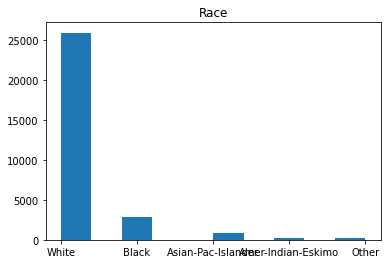

In [7]:
plt.hist(dataset1_train['race'], histtype='bar')
plt.title('Race')
plt.show()

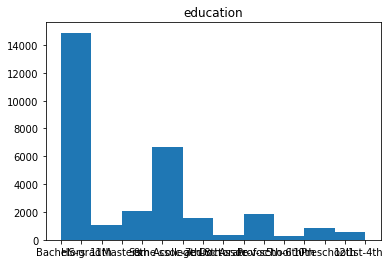

In [8]:
plt.hist(dataset1_train['education'], histtype='bar')
plt.title('education')
plt.show()

In [9]:
# Correlation
correlations = dataset1_train.corr(method ='pearson')

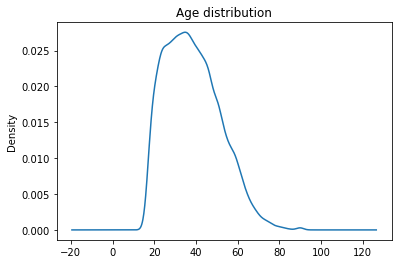

In [14]:
dataset1_train.age.plot(kind='kde')
plt.title('Age distribution')
plt.show()

In [18]:
dataset1_train['age'].corr(dataset1_train['over-50K'])

0.2419981362661184

## One-hot encoding

In [19]:
import category_encoders as ce

# Convert discrete variables into multiple variables using one-hot encoding
# Discrete columns: workclass, education, marital-status, occupation, relationship, sex, native-country
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'race', 'relationship'], use_cat_names=True)
train_encoded_1 = encoder.fit_transform(dataset1_train)
test_encoded_1 = encoder.transform(dataset1_test) 


/usr/local/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# Preprocessing Dataset #2